# Business Decision-Making: Hypothesis Prioritization and Testing.

**Project Description**

In collaboration with the marketing department of a large online store, we prepared a list of hypotheses to increase revenue. The goal is to formulate conclusions based on the analysis of these hypotheses.

**Data**

We have data on users acquired from May 1 to October 27, 2019:
- server log with data on their visits,
- their purchase history for this period,
- advertising expenses.

**Data Description**

Files:
- _`hypothesis.csv`_ — contains 9 hypotheses for increasing the revenue of the online store,
- _`orders.csv`_ — contains information on orders and A/B test results,
- _`visitors.csv`_ — contains information on users and A/B test results.

Structure of _hypothesis.csv_:
- Hypothesis — brief description of the hypothesis;
- Reach — user reach on a 10-point scale;
- Impact — impact on users on a 10-point scale;
- Confidence — confidence in the hypothesis on a 10-point scale;
- Efforts — resource costs for testing the hypothesis on a 10-point scale. The higher the Efforts value, the more expensive the hypothesis testing.

Structure of _orders.csv_:
- transactionId — order ID;
- visitorId — ID of the user who made the order;
- date — date when the order was placed;
- revenue — order revenue;
- group — A/B test group to which the order belongs.

Structure of _visitors.csv_:
- date — date;
- group — A/B test group;
- visitors — number of users on the specified date in the specified A/B test group.

**Research Objectives**
- Prioritize the hypotheses,
- Launch the A/B test,
- Analyze the results.

**Research Plan**
 1. Data overview.
 2. Data preprocessing.
 3. Hypothesis prioritization.
 4. Exploratory analysis of the A/B test.
 5. Statistical analysis of the A/B test.
 6. Conclusions.

## 1. Data overview.

In [1]:
# Все неодходимые библиотеки импортируем в данной ячейке
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('https://.../datasets/hypothesis.csv')
    orders = pd.read_csv('https://.../datasets/orders.csv')
    visitors = pd.read_csv('https://.../datasets/visitors.csv')

In [3]:
# Создадим список с именами переменных, в которых сохранили датафреймы. Будем использовать в цикле для удобства обзора данных.
list_df = [hypothesis, orders, visitors]
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.head(5))
    n += 1

 df 1 
                                          Hypothesis  Reach  Impact  \
0  Добавить два новых канала привлечения трафика,...      3      10   
1  Запустить собственную службу доставки, что сок...      2       5   
2  Добавить блоки рекомендаций товаров на сайт ин...      8       3   
3  Изменить структура категорий, что увеличит кон...      8       3   
4  Изменить цвет фона главной страницы, чтобы уве...      3       1   

   Confidence  Efforts  
0           8        6  
1           4       10  
2           7        3  
3           3        8  
4           1        1  
 df 2 
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
 df 3 
         date group  visitors
0  2019-08-01     A       719
1  201

In [4]:
# Проверим на пропуски
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.isnull().sum())
    n += 1

 df 1 
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
 df 2 
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
 df 3 
date        0
group       0
visitors    0
dtype: int64


Пропущенных значений нет.

In [5]:
# Ознакомимся с типом данных
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.info())
    n += 1

 df 1 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
 df 2 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
 df 3 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data c

Даты во всех датафрэймах приведем к значению "datetime" на следующем шаге Предобработка. 

In [6]:
# проведем проверку на явные дубликаты
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.duplicated().sum())
    n += 1

 df 1 
0
 df 2 
0
 df 3 
0


Явные дубликаты отсутствуют.

## 2. Data preprocessing.

#### Improving style and readability

In [7]:
# Изменим наименование столбцов, приведем их к нижнему регистру и удалим лишние пробелы если будут выявленны
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.columns)
    n += 1

 df 1 
Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')
 df 2 
Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')
 df 3 
Index(['date', 'group', 'visitors'], dtype='object')


In [8]:
# Приведем к нижнему регистру. Лишних пробелов для удаления нет.
for df in list_df:
    df.columns = df.columns.str.lower()

In [9]:
# Дополнительно отделим " id" в наименовании двух столбцов в "orders". Перезапишем список с наименованиями датафрэймов.
orders = orders.rename(columns={'transactionid': 'transaction_id', 'visitorid': 'visitor_id'})
list_df = [hypothesis, orders, visitors]

In [10]:
# Проверим результат
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.columns)
    n += 1

 df 1 
Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
 df 2 
Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')
 df 3 
Index(['date', 'group', 'visitors'], dtype='object')


#### Changing data types

In [11]:
# Даты в датафрэймах "orders" и "visitors" приведем к значению "datetime"
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
# Проверим результат
print('\033[34m\033[1m\033[4m orders \033[0m')
print(orders.info())
print('\033[34m\033[1m\033[4m visitors \033[0m')
print(visitors.info())

 orders 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
 visitors 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


## 3. Hypothesis prioritization.

In [13]:
# Изучим файл с гипотезами и оценками параметров
pd.set_option('display.max_colwidth', None)
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### ICE Calculation

In [14]:
# Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['ICE'] = hypothesis['ICE'].round(1)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


#### RICE Calculation

In [15]:
# Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'].round(1)
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Conclusion on Hypothesis Prioritization:**

Based on the combined analysis of the ICE and RICE calculations, the most promising hypotheses are:
- №1: "Add two new traffic acquisition channels, which will allow for a 30% increase in user acquisition" (ranked 2nd in ICE and 3rd in RICE);
- №8: "Add a subscription form on all main pages to build an email marketing list" (ranked 3rd in ICE and 1st in RICE).

Less promising, but still worth considering, is hypothesis №7: "Display banners with current promotions and sales on the homepage to increase conversion" (ranked 4th in ICE and tied for 3rd with hypothesis №1 in RICE).

Hypothesis №9: "Launch a promotion offering a discount on a user's birthday" ranked 1st in the ICE calculation due to its near-maximum score for expected audience impact, the researcher's confidence in its success, and a mid-level score for resource costs. However, it dropped lower in the rankings, taking 5th place in the RICE calculation due to a low score for the "reach" parameter, i.e., the estimated number of users affected by this change. This parameter was not considered in the ICE calculation.


## 4. Exploratory analysis of the A/B test.

In [16]:
# Изучим файлы с результатами A/B-тестов
print(orders.head())
print()
print(visitors.head())

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B

        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [17]:
# Подготовим данные для расчета кумулятивных метрик

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

#### Let's plot the cumulative revenue by group.

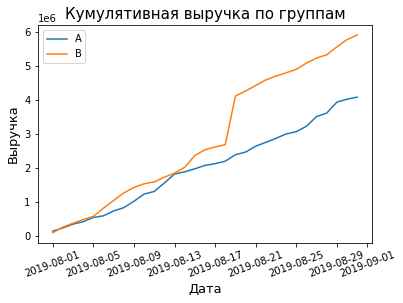

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам', fontsize = 15)
plt.ylabel('Выручка', fontsize = 13)
plt.xlabel('Дата', fontsize = 13)
plt.xticks(rotation = 20)
plt.legend()
plt.show()

В начале теста оба сегмента показывали одинаковые значения, но почти сразу выручка по сегмет В стала превышать сегмент А. На протяжении всего теста выручка по сегмнту В больше, однако в середине виден скачек в показателях. Похоже в данных присутствуют аномально большие заказы, которые могут влиять на результаты. При проведении дальнейшего иследования экстримальные значения целесообразно удалить.

#### Постройтим график кумулятивного среднего чека по группам.

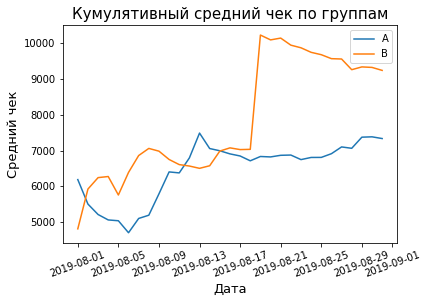

In [19]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label = 'B')
plt.title('Кумулятивный средний чек по группам', fontsize = 15)
plt.ylabel('Средний чек', fontsize = 13)
plt.xlabel('Дата', fontsize = 13)
plt.xticks(rotation = 20)
plt.legend()
plt.show()

Кумулятивное значение среднего чека колеблется. Видны скачки как в сегменте А, так и в сегменте В. Особенно заметен скачек в чеке по сегменту В, совпадающий по дате с экстремальным значением при расчтете выручки по группам. Делать выводы на таких данных ран, целесообразно избавиться от влияния экстремальных значений, которые могут искажать результаты.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [20]:
# Объединим таблицы cumulativeRevenueA и cumulativeRevenueB и сохраним в переменной mergedCumulativeRevenue
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

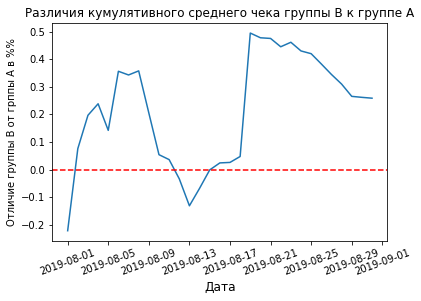

In [21]:
# Построим график относительного различия кумулятивного среднего чека группы B к группе A
# и добавим пунктирную линию оси X для оценки отношения показателей группы В к группе А - значение 0 по оси Y
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1
)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Различия кумулятивного среднего чека группы B к группе A', fontsize = 12)
plt.ylabel('Отличие группы В от грппы А в %%', fontsize = 10)
plt.xlabel('Дата', fontsize = 12)
plt.xticks(rotation = 20)
plt.show()

Группа В большую часть времени показывает себя лучше группы А. Но, видны резкие различия в среднем чеке между группами. Вероятно, на данные влияют выбросы.

#### Построим график кумулятивного среднего количества заказов на посетителя по группам.

In [22]:
# Добавим в датафрэйм "cumulativeData" колонку в которой посчитаем конверсию кол-ва посетителей в заказы
# Далее сделаем срезы по сегметам А и В и созраним их в отдельные датасеты
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

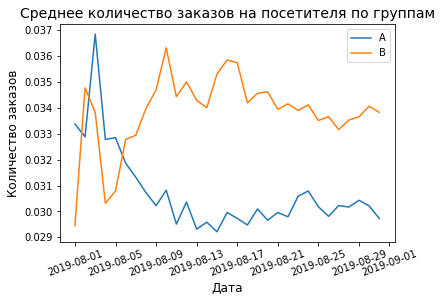

In [23]:
# Построим график изменения отношения среднего количества заказов на посетителя, по группам
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Среднее количество заказов на посетителя по группам', fontsize = 14)
plt.ylabel('Количество заказов', fontsize = 12)
plt.xlabel('Дата', fontsize = 12)
plt.xticks(rotation=20)
plt.legend()
plt.show()

На графиках в начале теста видны сильные колебания. Вероятно мы наблюдаем эффект "подглядывания", но нельзя и исключать наличие выбросов. Однако, группа В уверенно показывает лучшую конверсию по сравнению с А на протяжении больгего периода теста. Ближе к концу теста колебания становяться меньше. Целесообразно исключить влияние возможных выбросов.

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [24]:
# Объединим таблицы cumulativeDataA и cumulativeDataB и сохраним в переменной mergedCumulativeConversions
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

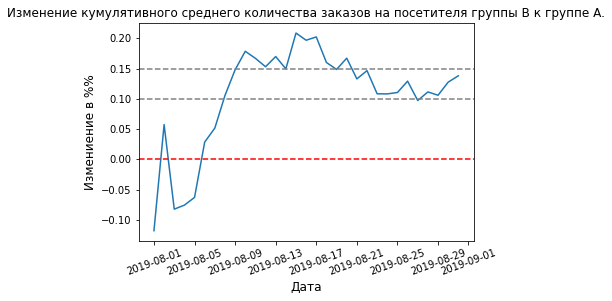

In [25]:
# Построим график относительного различия кумулятивного среднего чека группы B к группе A
# и добавим пунктирную линию оси X для оценки отношения показателей группы В к группе А - значение 0 по оси Y
plt.plot(
    mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA']-1
)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='gray', linestyle='--')
plt.axhline(y=0.15, color='gray', linestyle='--')
plt.xticks(rotation=20)
plt.title('Изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.', fontsize = 12)
plt.ylabel('Измениение в %%', fontsize = 12)
plt.xlabel('Дата', fontsize = 12)
plt.show()

Группа В лидирует по кнверсии. С середины теста показатели снизились, но все равно остаются в коридоре прироста между в 10%-15% относительно группы А. 

#### Построим точечный график количества заказов по пользователям.

In [26]:
# Найдем число заказов по пользователям используя датафрэйм orders. Сохраним данные в новый датафрейм ordersByUsers
ordersByUsers = orders.groupby('visitor_id', as_index=False)\
.agg({'transaction_id': 'nunique'}).sort_values(by='transaction_id')

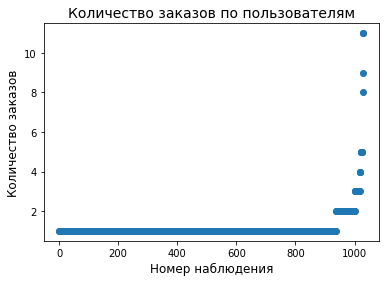

In [27]:
# Построим диаграмму Скаттрплот. За значения по оси х возьмем номера наблюдений.
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction_id'])
plt.title('Количество заказов по пользователям', fontsize = 14)
plt.ylabel('Количество заказов', fontsize = 12)
plt.xlabel('Номер наблюдения', fontsize = 12)
plt.show()

На графике видно, что в дольшинстве случаем пользователи совершают по одному заказу. В еденичных случах надлюдается более 4-х заказов но не больше 12. График показывает наличие единичных, но существенных выбросов по кол-ву заказов на пользователя. Эти выбросы могут быть аномальными.

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [28]:
# Выведем на экран 95-й и 99-й перцентили
print(np.percentile(ordersByUsers['transaction_id'], [95, 99]))

[2. 4.]


Больше 2-х заказов совершило не более 5% пользователей. А не более 1% пользователей совершило больше 4 заказов.
Целесообразно установить границу для определения аномальных значений на уровне 99-го перцентиля, т.е. исключить пользователей совершивших 4 и более заказа.

#### Построим точечный график стоимостей заказов.

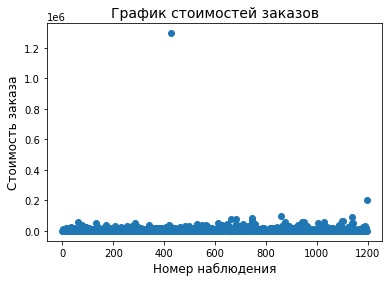

In [29]:
# Построим диаграмму Скаттрплот. За значения по оси х возьмем номера наблюдений.
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов', fontsize = 14)
plt.ylabel('Стоимость заказа', fontsize = 12)
plt.xlabel('Номер наблюдения', fontsize = 12)
plt.show()

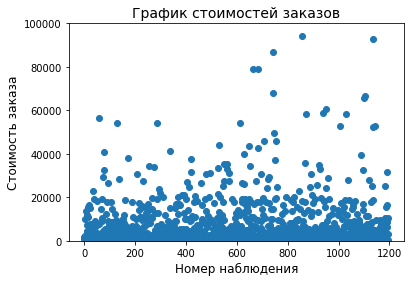

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов', fontsize = 14)
plt.ylabel('Стоимость заказа', fontsize = 12)
plt.xlabel('Номер наблюдения', fontsize = 12)
plt.ylim(0, 100000)
plt.show()

При основной массе заказов соимость 100 тыс., видны единичные выбросы до 200 тыс. и до более 1,2 млн. Целесообразно определить границу отсечений экстремальных значений, для чего посчитать перцентили.

#### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [31]:
# Выведем на экран 95-й и 99-й перцентили
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов имеет стоимость более 28 000 и не более 1% стоимость более 58 233,2. Целесообразно установить границу для определения аномальных значений на уровне 99-го перцентиля, т.е. исключить заказы стоимостью 58 233,2 и более.

## 5. Statistical analysis of the A/B test.

#### Подготовка данных к статистическому анализу A/B-теста.

In [32]:
# Сохраним в датасеты visitorsADaily и visitorsBDaily срезы с данными о количестве посетителей за каждую дату
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [33]:
# Сохраним в датасеты visitorsACummulative и visitorsBCummulative данные о накопленной сумме кол-ва посетителей
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [34]:
# Сохраним в датасеты ordersADaily и ordersBDaily данные о кол-ве заказов и их стоимости на дату в разбивке по группам
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [35]:
# Сохраним в датасеты ordersACummulative и ordersBCummulative данные о накопленной сумме кол-ва заказов и их стоимости
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [36]:
# Объединим все полученные выше датасеты в один датасет
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [37]:
# Создадим срезы для каждой из групп А и В с группировкой по ID пользователя, которому будет соответсвовать кол-во заказов
# Сохраним срезы в отдельные датасеты ordersByUsersA и ordersByUsersB
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
ordersByUsersA.columns = ['user_id', 'orders']
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
ordersByUsersB.columns = ['user_id', 'orders']

In [38]:
# Создадим датасеты sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя.
# При этом пользователям без заказов будут соответствовать нули. 
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

Сформулируем нулевую и альтернативную гипотезы:
- H0: в среднем количестве заказов на посетителя между группами А и В по «сырым» данным нет статистически значимых различий.
- H1: в среднем количестве заказов на посетителя между группами А и В по «сырым» данным есть статистически значимые различия.

Уровень значимости объявим в 0,05

In [39]:
# Применим тест Манна-Уитни и выведим p-value для сравнения среднего между группами
print('P-value: '"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие в среднем между группами: ' "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.017
Относительное различие в среднем между группами: 0.138


P-value меньше уровня значимости значит мы отвергаем нулевую гипотезу. По результату анализа "сырых данных", в среднем кол-ве заказов между группами есть статистически значимые различия.

При этом относительный прирост среднего группы В к группе А равен 13,8%

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Гипотезы:
- H0: в среднем чеке заказа между группами А и В по «сырым» данным нет статистически значимых различий.
- H1: в среднем чеке заказа между группами А и В по «сырым» данным есть статистически значимые различия.

Уровень значимости: 0,05

In [40]:
# Применим тест Манна-Уитни и выведим p-value для сравнения среднего между группами
print('P-value: ''{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
print('Относительное различие в среднем между группами: ''{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))

P-value: 0.729
Относительное различие в среднем между группами: 0.259


P-value больше 0,05, следовательно статистически значимых отличий между группами нет. Нулевую гипотезу отвергнуть не удалось.

Относительное различие между группами 25,9%

#### Let's calculate the statistical significance of the differences in the average number of orders per visitor between the groups based on the "cleared" data.

Hypotheses:
- H0: there are no statistically significant differences in the average number of orders per visitor between groups A and B according to the "cleared" data.
- H1: There are statistically significant differences in the average number of orders per visitor between groups A and B according to the "cleared" data.

Significance level: 0.05

In [41]:
# Определим пользователей с аномальнми заказы по ранее определенным границам
# Сохраним их в переменной abnormalUsers
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] >= 4]['user_id'], ordersByUsersB[ordersByUsersB['orders'] >= 4]['user_id']], axis=0
)
usersWithExpensiveOrders = orders[orders['revenue'] >= 58233.2]['visitor_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [42]:
#  Посчитаем статистическую значимость различий
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

print('P-value: ''{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие в среднем между группами: ''{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.01390
Относительное различие в среднем между группами: 0.151


As in the case of "raw" data, we reject the null hypothesis. The differences in the number of orders between the groups are statistically significant.

#### Let's calculate the statistical significance of the differences in the average order receipt between the groups based on the "cleared" data.

Hypotheses:
- H0: there are no statistically significant differences in the average order receipt between groups A and B according to the "cleared" data.
- H1: There are statistically significant differences in the average order receipt between groups A and B according to the "cleared" data.

Significance level: 0.05

In [43]:
print(
    'P-value: ''{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительное различие в среднем между группами: ''{0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value: 0.959
Относительное различие в среднем между группами: -0.014


The P-value on the "cleaned" data is still above the level of statistical significance. The null hypothesis could not be rejected. There are no statistically significant differences in the average amount of orders between the groups.

#### Making a decision based on the test results.

It was determined that:
- There is a statistically significant difference in the average number of orders per visitor (conversion) between the groups, both for the "raw" data and the "cleaned" data.
- There is no statistically significant difference in the average order value between the groups, both for the "raw" data and after removing anomalies.
- The conversion rate difference graph between the groups shows stabilization in the 10%-15% range.
- The average order value difference graph fluctuates, but as mentioned above, the differences between the groups are not statistically significant.

**Decision:**

Stop the test and declare Group B the winner.

Rationale: A sufficiently long period for drawing conclusions, eliminating the "peeking" effect, and checking for anomalies. The conversion rate difference graph indicates stabilization in an established "range" of values.

## 6. Conclusions.

Group B performed better than Group A in terms of the average number of orders. Although the average order value in both groups did not change, the increase in the average number of orders can be considered a success and serves as a basis for recommending that the business apply the changes tested on Group B to a larger number of users.

Group B shows a relative increase in the average number of orders by 15%, which could contribute to revenue growth through higher sales volume.